ARCHANA RAMACHANDRAN FINAL CAPSTONE

SALES PREDICTION

Introduction:

This is to analyze the data results by means of getting the answers regarding top-performing product lines, Countries,yearly and monthly sales trends This is to test the models based on Time series analysis. The objective is to build a model that predicts the Sales based on order of the product and to find the most products used, Top country revenues used by yearly or monthly wise results

A prediction model will assist businesses in planning and responding to changes based on the outcomes derived from the model. It also aids in understanding business patterns and determining necessary actions if performance is suboptimal.

The dataset will be obtained from Kaggle. Sales_sample_data.Csv is the data source.

Several steps need to be undertaken before starting to build the prediction model using time series analysis or regression models. These steps include:

Data Processing/Wrangling/EDA/Descriptive Analysis: Clean, prepare, and explore the data to understand trends, patterns, and potential issues that could impact further analysis.
2.Feature Selection Using Supervised Machine Learning Techniques: This is particularly suitable if you opt for the sales data sample. Identify significant features or variables using machine learning methods.

Time Series Model Development: Construct a model to forecast future values based on historical data trends in the chosen dataset.

Conclusion: Draw comprehensive conclusions about the performance, significance, and potential implications of the time series model. Discuss any insights or patterns uncovered and their practical applications or interpretations

DATA IMPORT

In [ ]:
#KNOW YOUR DATA
#Data Set up

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
import matplotlib.pyplot as plt # plotting
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats.mstats import winsorize
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn import metrics
import time
import matplotlib.ticker as ticker
import plotly.express as px

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

import plotly.express as px
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import os # accessing directory structure
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import pandas as pd
import math
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Data Loading

import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive' , force_remount=True)
path = "/content/gdrive/MyDrive/Colab Notebooks/sales_data_sample.csv"
Sale_df = pd.read_csv(path, encoding = 'unicode_escape')
print(Sale_df.info())
print('Dimensions:', Sale_df.shape)

Sale_df.sort_values(by=['ORDERNUMBER'])

Mounted at /content/gdrive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2   

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
578,10100,30,100.00,3,5151.00,1/6/2003 0:00,Shipped,1,1,2003,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Medium
2024,10100,49,34.47,1,1689.03,1/6/2003 0:00,Shipped,1,1,2003,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Small
680,10100,50,67.80,2,3390.00,1/6/2003 0:00,Shipped,1,1,2003,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Medium
1267,10100,22,86.51,4,1903.22,1/6/2003 0:00,Shipped,1,1,2003,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Small
728,10101,25,100.00,4,3782.00,1/9/2003 0:00,Shipped,1,1,2003,...,Lyonerstr. 34,NaN,Frankfurt,NaN,60528,Germany,EMEA,Keitel,Roland,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2405,10425,18,100.00,2,1895.94,5/31/2005 0:00,In Process,2,5,2005,...,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,EMEA,Labrune,Janine,Small
393,10425,33,100.00,4,4692.60,5/31/2005 0:00,In Process,2,5,2005,...,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,EMEA,Labrune,Janine,Medium
160,10425,38,100.00,12,5894.94,5/31/2005 0:00,In Process,2,5,2005,...,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,EMEA,Labrune,Janine,Medium
780,10425,19,49.22,10,935.18,5/31/2005 0:00,In Process,2,5,2005,...,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,EMEA,Labrune,Janine,Small


Data Engineering: This data set have 2823 rows and 25 columns. Here its the description. ORDERNUMBER : Order number

QUANTITYORDER : Quantity of products

PRICEEACH : Price for 1 product

ORDERLLINENUMBER : Orderline number of order number

SALES : Sale amount of order

ORDERDATE : Date of order

STATUS : Status of order

QTR_ID : Quarter of order (1: Quarter 1, 2: Quarter 2,etc.)

MONTH_ID : Month of order (1: January, 2: February, 3: March, etc.)

YEAR_ID : Year of order

PRODUCTLINE : Product category

MSRP : Manufacturer's suggested retail price

PRODUCTCODE : Product number

CUSTOMERNAME : Customer name

PHONE : Customer's phone name

ADDRESSLINE1 : Address information of customer 1

ADDRESSLINE2 : Address information of customer 2

CITY : City of address

STATE : State of address

POSTALCODE : Postalcode of address

COUNTRY : Country of address

TERRITORY : Region of address

CONTACTLASTNAME : Contac person's last name for customer

CONTACTFIRSTNAME : Contac person's first name for customer

DEALSIZE : Size of the sale for order line

In [ ]:
Sale_df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [ ]:
Sale_df['ORDERDATE'] = pd.to_datetime(Sale_df['ORDERDATE'])

In [ ]:
Sale_df['ORDERDATE'].max()

Timestamp('2005-05-31 00:00:00')

In [ ]:
Sale_df['ORDERDATE'].min()

Timestamp('2003-01-06 00:00:00')

In [ ]:
dates = Sale_df['ORDERDATE'].values

In [ ]:
dates

array(['2003-02-24T00:00:00.000000000', '2003-05-07T00:00:00.000000000',
       '2003-07-01T00:00:00.000000000', ...,
       '2005-03-01T00:00:00.000000000', '2005-03-28T00:00:00.000000000',
       '2005-05-06T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
# Checking null values
Sale_df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


We have null values in column called Addressline2,state,territory and postalcode.we need to remove it.

In [ ]:
to_drop = ['ADDRESSLINE2','STATE','POSTALCODE','TERRITORY']
Sale_df = Sale_df.drop(to_drop, axis = 1)

In [ ]:
# Checking duplicate values
len(Sale_df) == len(Sale_df.drop_duplicates())

True

In [ ]:
Sale_df.head(n=5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,USA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,USA,Brown,Julie,Medium


In [ ]:
Sale_df.isnull().sum()

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
CITY                0
COUNTRY             0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

In [ ]:
Sale_df.nunique()

ORDERNUMBER          307
QUANTITYORDERED       58
PRICEEACH           1016
ORDERLINENUMBER       18
SALES               2763
ORDERDATE            252
STATUS                 6
QTR_ID                 4
MONTH_ID              12
YEAR_ID                3
PRODUCTLINE            7
MSRP                  80
PRODUCTCODE          109
CUSTOMERNAME          92
PHONE                 91
ADDRESSLINE1          92
CITY                  73
COUNTRY               19
CONTACTLASTNAME       77
CONTACTFIRSTNAME      72
DEALSIZE               3
dtype: int64

In [ ]:
## calculate the percentages of the missing values in all columns:

Sale_df.isnull().sum()*100/Sale_df.isnull().count()

ORDERNUMBER         0.0
QUANTITYORDERED     0.0
PRICEEACH           0.0
ORDERLINENUMBER     0.0
SALES               0.0
ORDERDATE           0.0
STATUS              0.0
QTR_ID              0.0
MONTH_ID            0.0
YEAR_ID             0.0
PRODUCTLINE         0.0
MSRP                0.0
PRODUCTCODE         0.0
CUSTOMERNAME        0.0
PHONE               0.0
ADDRESSLINE1        0.0
CITY                0.0
COUNTRY             0.0
CONTACTLASTNAME     0.0
CONTACTFIRSTNAME    0.0
DEALSIZE            0.0
dtype: float64

In [ ]:
Sale_df.shape

(2823, 21)

In [ ]:
Sale_df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


<Axes: >

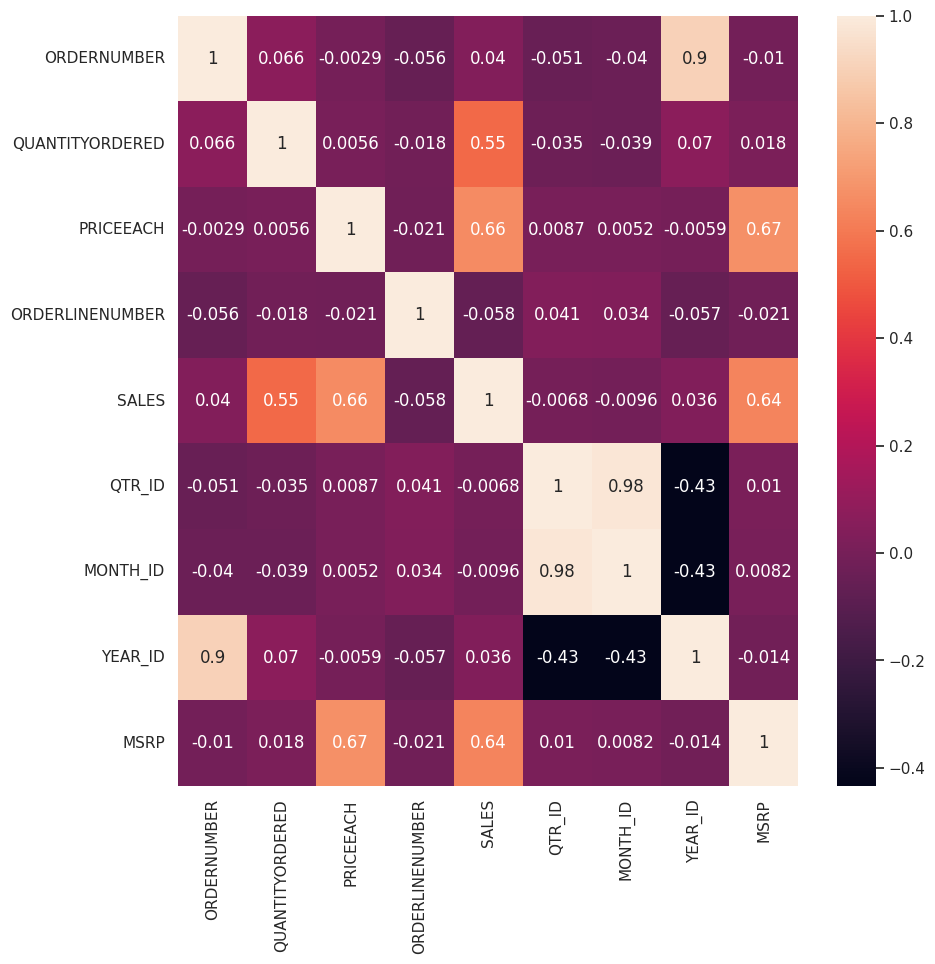

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,10))
corr_matrix = Sale_df.corr()
sns.heatmap(corr_matrix, annot = True)


The matrix shows notable relationships: 'Qtr_id' vs. 'Month_id' and 'MSRP' vs. 'price each'. also MSRP vs Sales

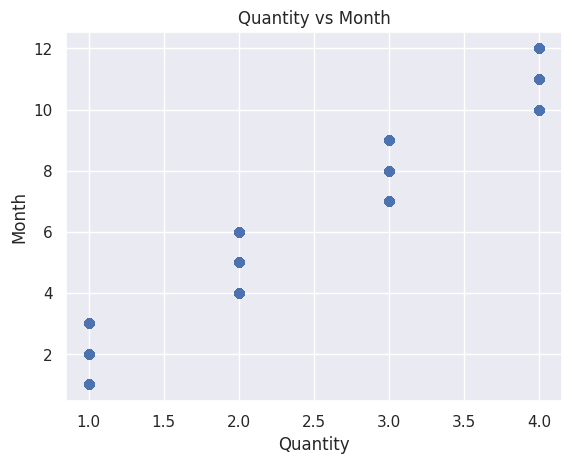

In [ ]:
x = Sale_df.QTR_ID
y = Sale_df.MONTH_ID

plt.scatter(x, y)
plt.title("Quantity vs Month")
plt.xlabel("Quantity")
plt.ylabel("Month")
plt.show()

Lets inspect second relationship of correlation matrix

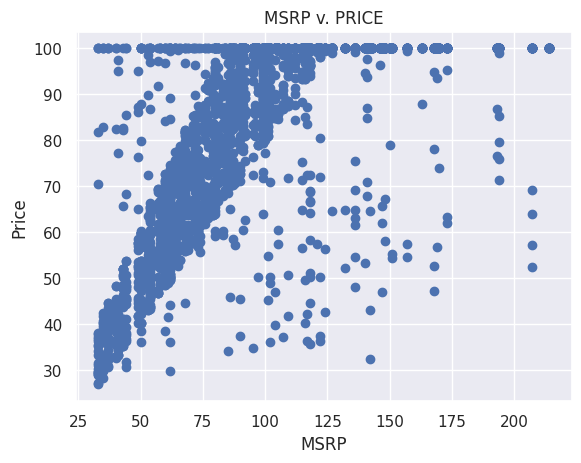

In [ ]:
x = Sale_df.MSRP
y = Sale_df.PRICEEACH

plt.scatter(x, y)
plt.title("MSRP v. PRICE")
plt.xlabel("MSRP")
plt.ylabel("Price")
plt.show()

Text(1, 5, 'R² = 0.54')

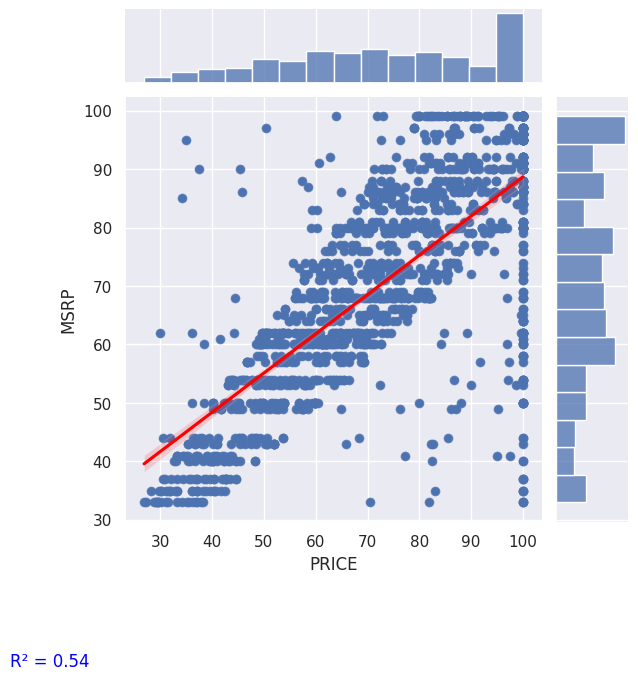

In [ ]:
from scipy import stats
below_100 = Sale_df[Sale_df["MSRP"] < 100]

x = below_100.PRICEEACH
y = below_100.MSRP

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
r_squared = r_value**2

ax = sns.jointplot(x=x, y=y, data = below_100)
sns.regplot(x=x, y=y, data= below_100, ci=95, line_kws={"color": "red"})
ax.set_axis_labels("PRICE", "MSRP")
plt.text(1, 5, f'R² = {r_squared:.2f}', fontsize=12, color='blue')

Text(1, 5, 'R² = 0.01')

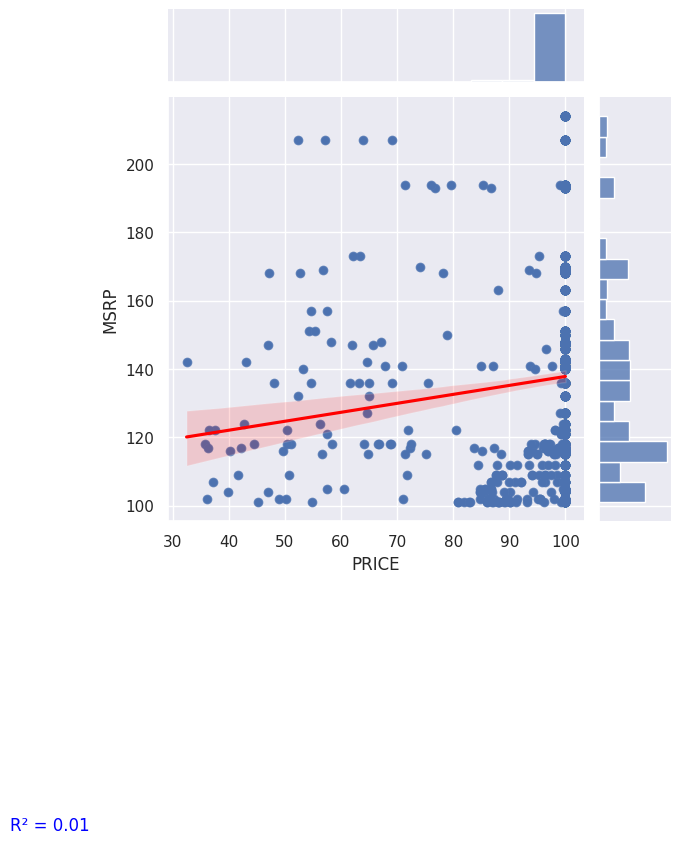

In [ ]:
from scipy import stats
Above_100 = Sale_df[Sale_df["MSRP"] > 100]

x = Above_100.PRICEEACH
y = Above_100.MSRP

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
r_squared = r_value**2

ax = sns.jointplot(x=x, y=y, data = Above_100)
sns.regplot(x=x, y=y, data= Above_100, ci=95, line_kws={"color": "red"})
ax.set_axis_labels("PRICE", "MSRP")
plt.text(1, 5, f'R² = {r_squared:.2f}', fontsize=12, color='blue')

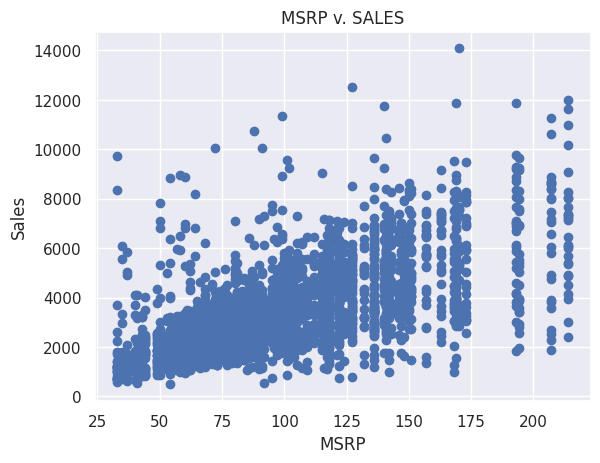

In [ ]:
x = Sale_df.MSRP
y = Sale_df.SALES

plt.scatter(x, y)
plt.title("MSRP v. SALES")
plt.xlabel("MSRP")
plt.ylabel("Sales")
plt.show()

Text(1, 5, 'R² = 0.18')

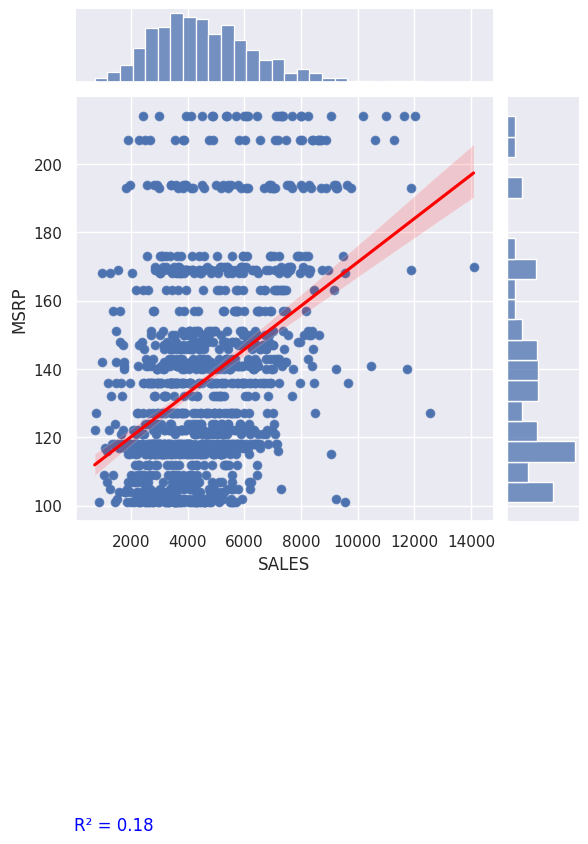

In [ ]:
from scipy import stats
Above_100 = Sale_df[Sale_df["MSRP"] > 100]

x = Above_100.SALES
y = Above_100.MSRP

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
r_squared = r_value**2

ax = sns.jointplot(x=x, y=y, data = Above_100)
sns.regplot(x=x, y=y, data= Above_100, ci=95, line_kws={"color": "red"})
ax.set_axis_labels("SALES", "MSRP")
plt.text(1, 5, f'R² = {r_squared:.2f}', fontsize=12, color='blue')

Text(1, 5, 'R² = 0.17')

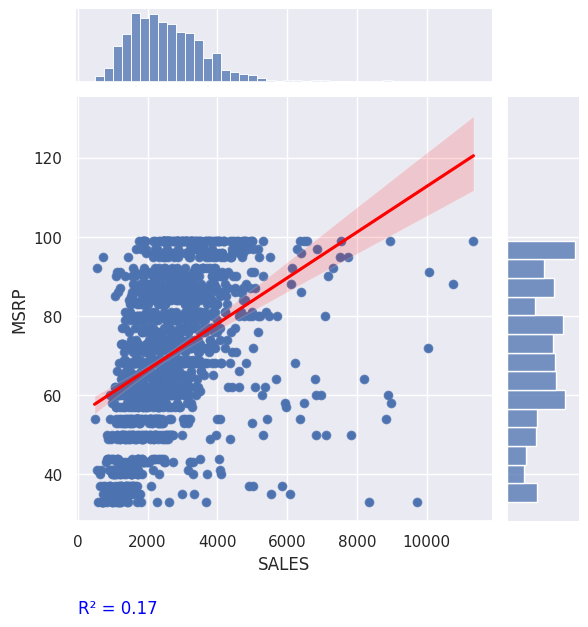

In [ ]:
from scipy import stats
Below_100 = Sale_df[Sale_df["MSRP"] < 100]

x = Below_100.SALES
y = Below_100.MSRP

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
r_squared = r_value**2

ax = sns.jointplot(x=x, y=y, data = Below_100)
sns.regplot(x=x, y=y, data= Below_100, ci=95, line_kws={"color": "red"})
ax.set_axis_labels("SALES", "MSRP")
plt.text(1, 5, f'R² = {r_squared:.2f}', fontsize=12, color='blue')

EDA Visualization

<Axes: xlabel='SALES', ylabel='PRODUCTLINE'>

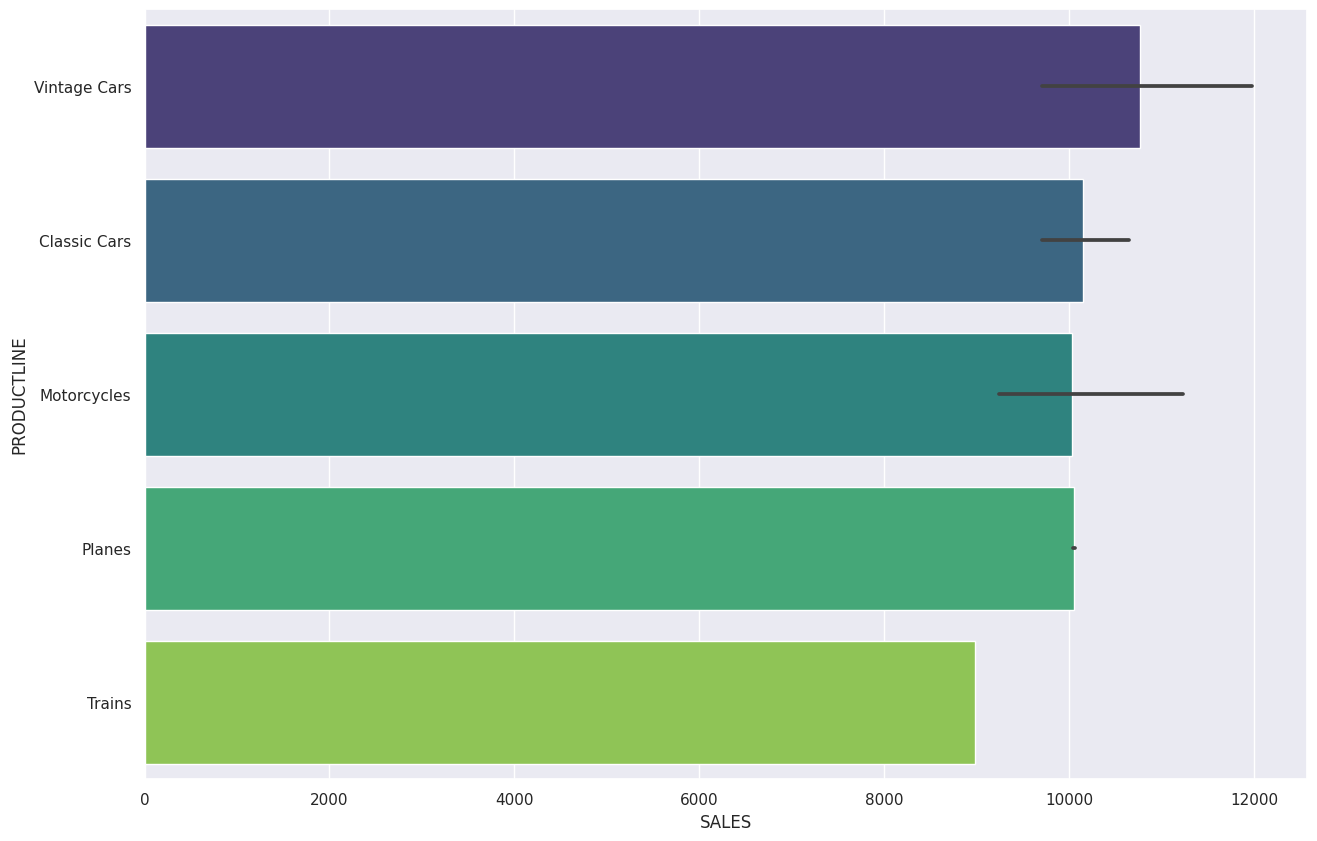

In [ ]:
Highest_Sales = Sale_df.sort_values('SALES', ascending = False).head(35).set_index('PRODUCTLINE')
plt.figure(figsize=(15,10))
sns.barplot(x=Highest_Sales['SALES'], y=Highest_Sales.index, palette = 'viridis')

REsult: Highest Sales is Vintage Car.

<Axes: xlabel='MSRP', ylabel='COUNTRY'>

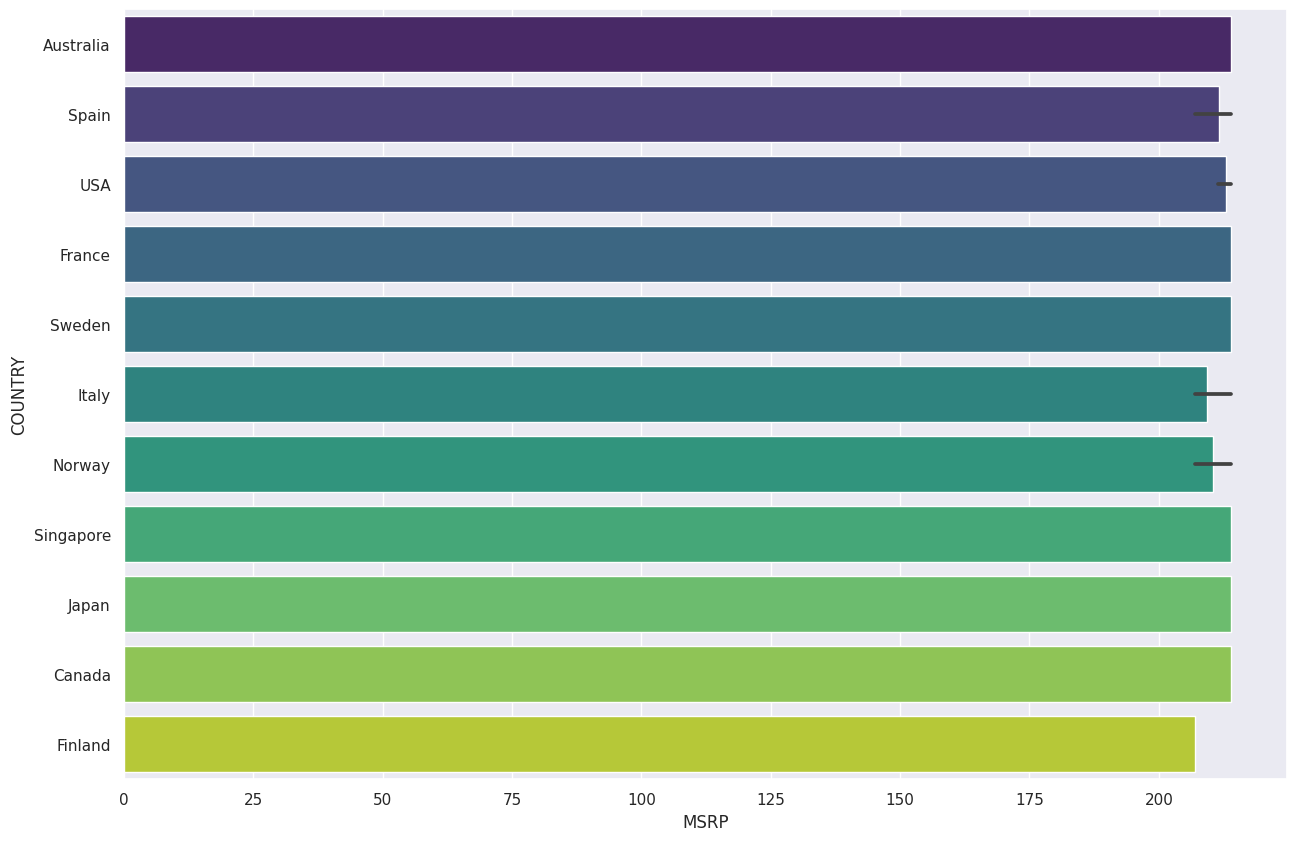

In [ ]:
Highest_MSRP = Sale_df.sort_values('MSRP', ascending = False).head(35).set_index('COUNTRY')
plt.figure(figsize=(15,10))
sns.barplot(x=Highest_MSRP['MSRP'], y=Highest_MSRP.index, palette = 'viridis')

Highest MSRP in country name is ITALY. and least is Norway

In [ ]:

Sale_df['PRODUCTLINE'].value_counts()

Classic Cars        967
Vintage Cars        607
Motorcycles         331
Planes              306
Trucks and Buses    301
Ships               234
Trains               77
Name: PRODUCTLINE, dtype: int64

In [ ]:
#Find sales Product line wise
(Sale_df.groupby('PRODUCTLINE').sum()['SALES']).sort_values()

PRODUCTLINE
Trains               226243.47
Ships                714437.13
Planes               975003.57
Trucks and Buses    1127789.84
Motorcycles         1166388.34
Vintage Cars        1903150.84
Classic Cars        3919615.66
Name: SALES, dtype: float64

In [ ]:
Sale_df.groupby('YEAR_ID').sum()['SALES']

YEAR_ID
2003    3516979.54
2004    4724162.60
2005    1791486.71
Name: SALES, dtype: float64

In [ ]:
#Find sales Product line wise
(Sale_df.groupby('PRODUCTLINE').sum()['SALES']).sort_values()

PRODUCTLINE
Trains               226243.47
Ships                714437.13
Planes               975003.57
Trucks and Buses    1127789.84
Motorcycles         1166388.34
Vintage Cars        1903150.84
Classic Cars        3919615.66
Name: SALES, dtype: float64

In [ ]:
Sale_df.groupby('YEAR_ID').sum()['SALES']

YEAR_ID
2003    3516979.54
2004    4724162.60
2005    1791486.71
Name: SALES, dtype: float64

In [ ]:
#Find total sales yearwise

Sale_df['YEAR_ID'].value_counts()

2004    1345
2003    1000
2005     478
Name: YEAR_ID, dtype: int64

In [ ]:
#Find total sales monthly wise

Sale_df['MONTH_ID'].value_counts()

11    597
10    317
5     252
1     229
2     224
3     212
8     191
12    180
4     178
9     171
7     141
6     131
Name: MONTH_ID, dtype: int64

<Axes: xlabel='YEAR_ID', ylabel='SALES'>

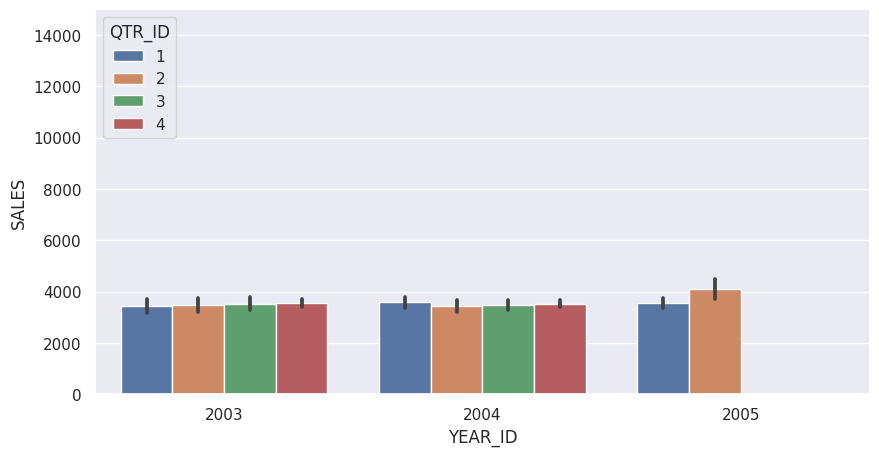

In [ ]:
plt.figure(figsize=(10,5))
plt.ylim(top=15000)
sns.barplot(x='YEAR_ID',y='SALES',data=Sale_df,hue='QTR_ID')

<Axes: xlabel='MONTH_ID', ylabel='SALES'>

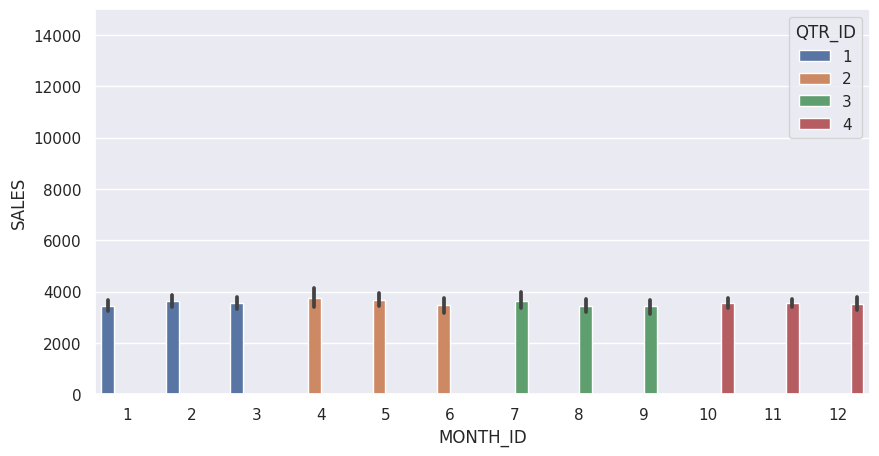

In [ ]:
plt.figure(figsize=(10,5))
plt.ylim(top=15000)
sns.barplot(x='MONTH_ID',y='SALES',data=Sale_df,hue='QTR_ID')

<Axes: xlabel='ORDERDATE', ylabel='SALES'>

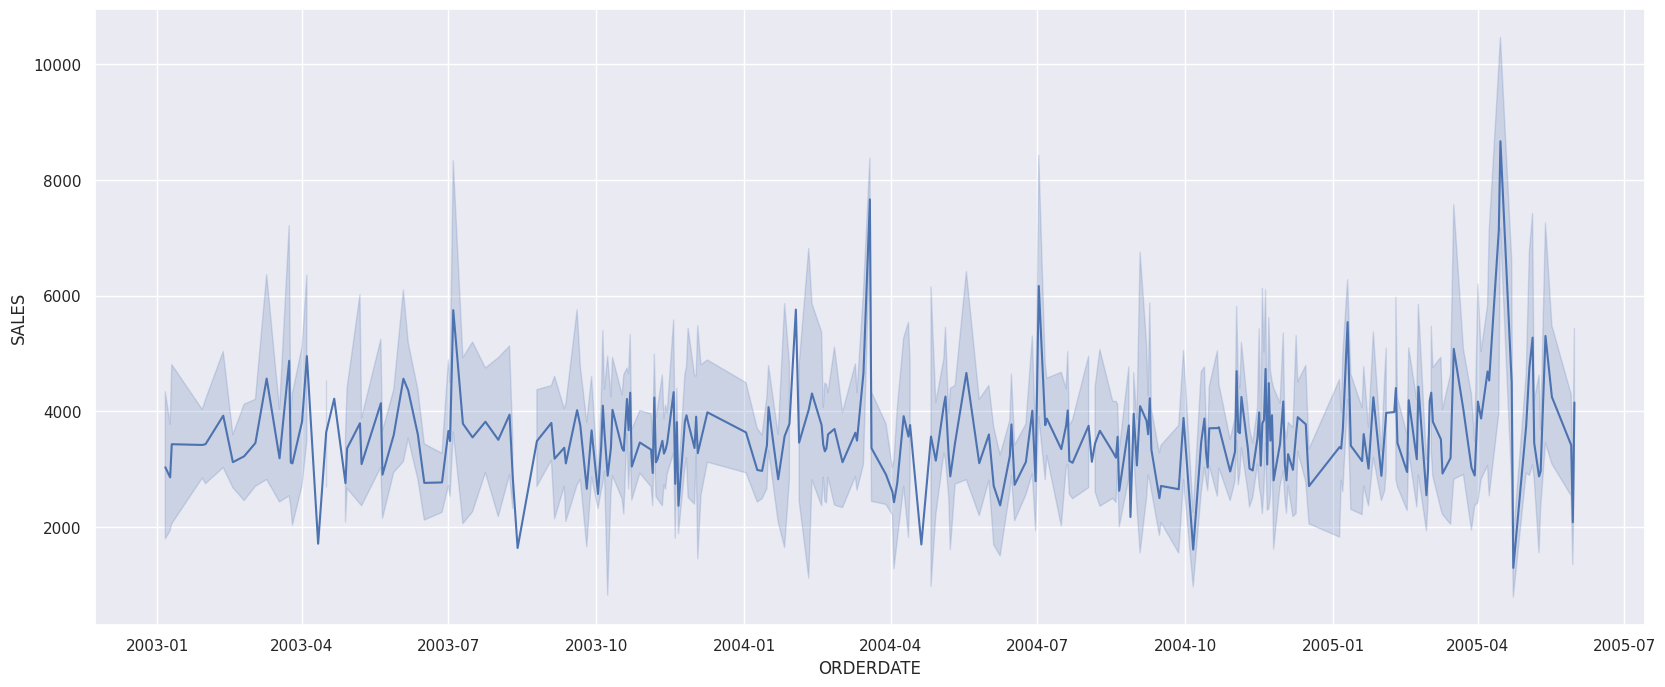

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(x='ORDERDATE', y='SALES', data=Sale_df)

In [ ]:
top_customer = Sale_df.groupby(['CUSTOMERNAME']).sum().sort_values('SALES', ascending = False).head(20)
top_customer = top_customer[['SALES']].round(3)
top_customer.reset_index(inplace = True)

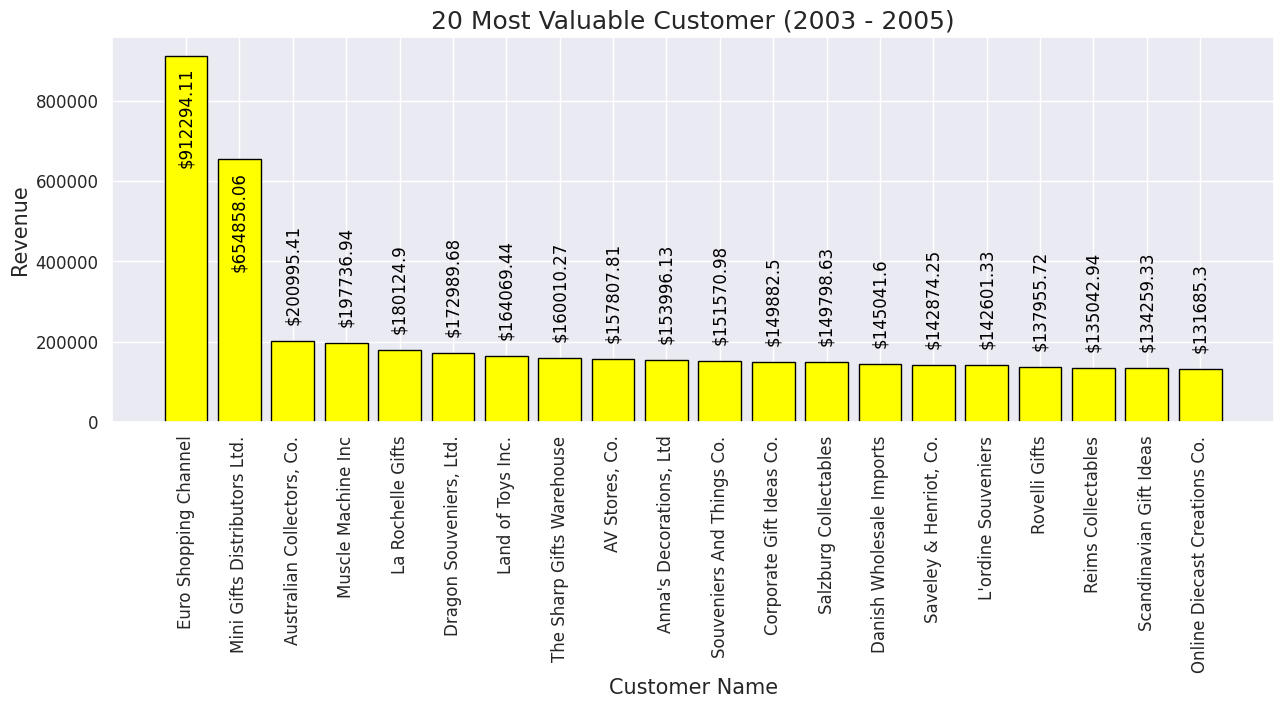

In [ ]:
plt.figure(figsize = (15,5))
plt.title('20 Most Valuable Customer (2003 - 2005)', fontsize = 18)
plt.bar(top_customer['CUSTOMERNAME'], top_customer['SALES'], color = 'yellow', edgecolor = 'black', linewidth = 1)
plt.xlabel('Customer Name', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 90)
plt.yticks(fontsize = 12)
for k, v in top_customer['SALES'].items():
    if v > 600000:
        plt.text(k, v-270000, '$' + str(v), fontsize = 12, rotation = 90, color = 'black', ha = 'center')
    else:
        plt.text(k, v+ 50000, '$' + str(v), fontsize = 12, rotation = 90, color = 'black', ha = 'center')

In [ ]:
Top_product = Sale_df.groupby(['PRODUCTLINE']).sum().sort_values('QUANTITYORDERED', ascending = False).head(20)
Top_product = Top_product[['QUANTITYORDERED']].round(3)
Top_product.reset_index(inplace = True)

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.,
        40000.]),
 [Text(0, 0.0, '0'),
  Text(0, 5000.0, '5000'),
  Text(0, 10000.0, '10000'),
  Text(0, 15000.0, '15000'),
  Text(0, 20000.0, '20000'),
  Text(0, 25000.0, '25000'),
  Text(0, 30000.0, '30000'),
  Text(0, 35000.0, '35000'),
  Text(0, 40000.0, '40000')])

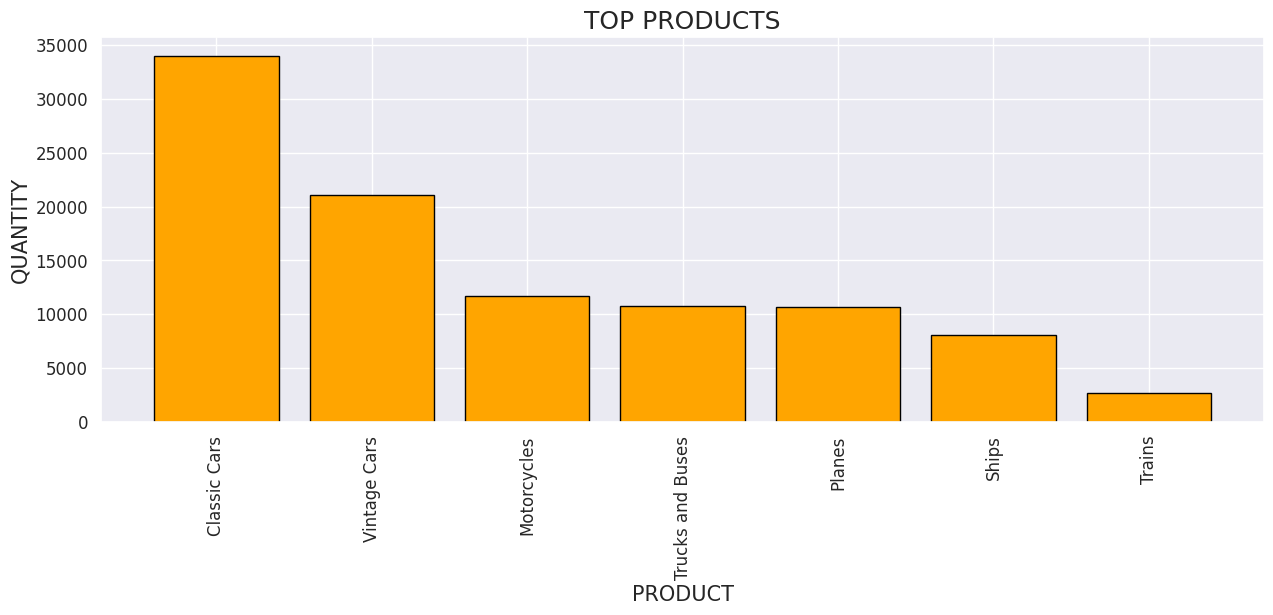

In [ ]:
plt.figure(figsize = (15,5))
plt.title('TOP PRODUCTS', fontsize = 18)
plt.bar(Top_product['PRODUCTLINE'], Top_product['QUANTITYORDERED'], color = 'orange', edgecolor = 'black', linewidth = 1)
plt.xlabel('PRODUCT', fontsize = 15)
plt.ylabel('QUANTITY', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 90)
plt.yticks(fontsize = 12)


In [ ]:
#Top Country By Sales
top_country = Sale_df.groupby(['COUNTRY']).sum().sort_values('SALES', ascending = False).head(20)
top_country = top_country[['SALES']].round(3)
top_country.reset_index(inplace = True)

NameError: ignored

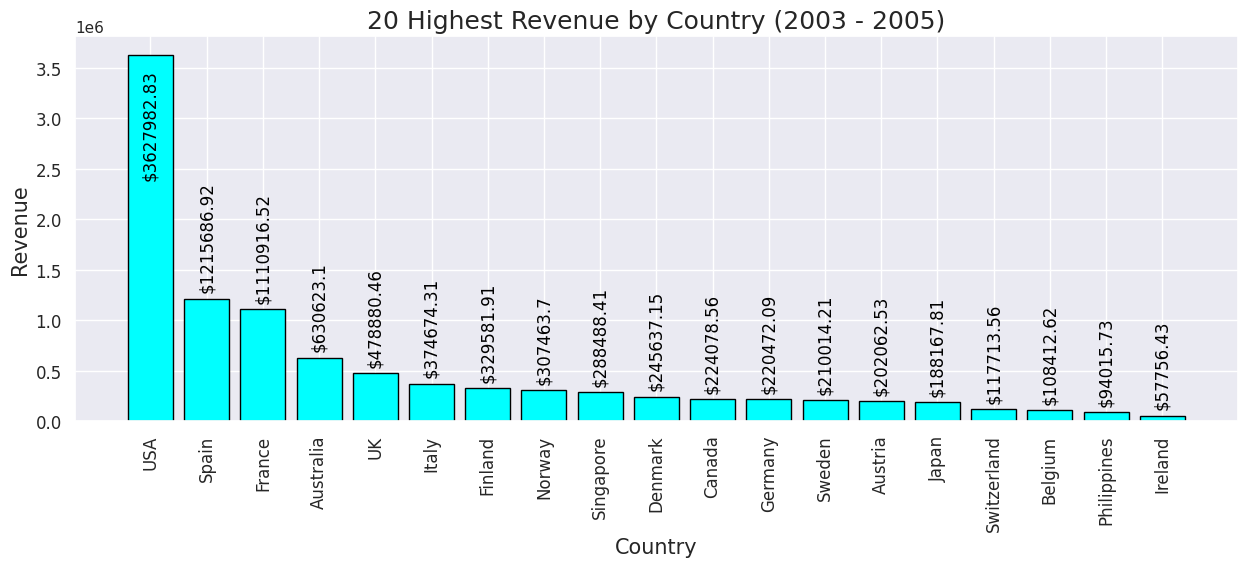

In [ ]:
plt.figure(figsize = (15,5))
plt.title('20 Highest Revenue by Country (2003 - 2005)', fontsize = 18)
plt.bar(top_country['COUNTRY'], top_country['SALES'], color = 'Aqua', edgecolor = 'black', linewidth = 1)
plt.xlabel('Country', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 90)
plt.yticks(fontsize = 12)
for k, v in top_country['SALES'].items():
    if v > 3000000:
        plt.text(k, v-1200000, '$' + str(v), fontsize = 12, rotation = 90, color = 'black', ha = 'center')
    else:
        plt.text(k, v+100000, '$' + str(v), fontsize = 12, rotation = 90, color = 'black', ha = 'center')

Feature Selection Process

In [ ]:
df_final=Sale_df.copy()

PREDICTION MODELS

In [ ]:
Sale_df.sort_values(by = ['ORDERDATE'], inplace = True)
Sale_df.set_index('ORDERDATE', inplace = True)

In [ ]:
new_data = pd.DataFrame(Sale_df['SALES'])
new_data.head()

,SALES
ORDERDATE,
2003-01-06,5151.00
2003-01-06,3390.00
2003-01-06,1903.22
2003-01-06,1689.03
2003-01-09,1404.00


<Axes: xlabel='ORDERDATE'>

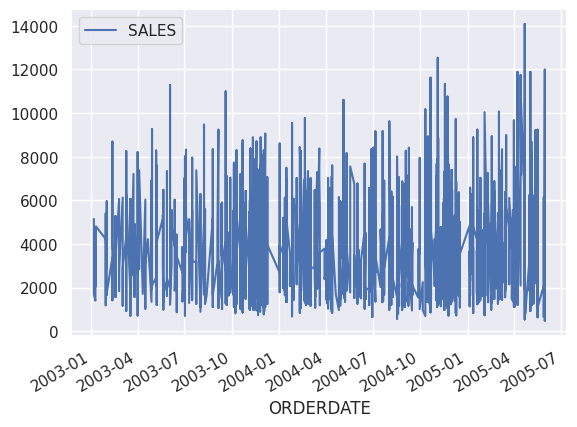

In [ ]:
new_data.plot()

Checking for Stationary

In [ ]:
new_data = pd.DataFrame(new_data['SALES'].resample('D').mean())
new_data = new_data.interpolate(method = 'linear')

In [ ]:
import numpy as np

train, test, validation = np.split(new_data['SALES'].sample(frac = 1), [int(.6*len(new_data['SALES'])), int(.8*len(new_data['SALES']))])

In [ ]:
print('Train Dataset')
print(train)
print('Test Dataset')
print(test)
print('Validation Dataset')
print(validation)

Train Dataset
ORDERDATE
2003-05-07    3794.392000
2004-12-13    3825.874167
2004-01-04    3450.183810
2003-02-16    3255.110481
2005-02-02    3621.671667
                 ...     
2004-01-10    2980.789216
2004-05-09    3071.556952
2003-03-31    3701.390833
2004-06-11    2800.172500
2004-03-09    3566.662667
Name: SALES, Length: 526, dtype: float64
Test Dataset
ORDERDATE
2004-10-29    2959.987143
2004-05-31    3517.735701
2003-06-12    3597.365556
2003-10-10    3366.997368
2004-04-26    3564.500000
                 ...     
2004-01-27    3642.190286
2004-11-29    3438.473333
2004-07-01    4480.015714
2004-05-19    4469.381181
2004-11-13    3166.718444
Name: SALES, Length: 175, dtype: float64
Validation Dataset
ORDERDATE
2003-11-04    3337.064706
2003-09-23    3205.115250
2004-11-15    3543.485333
2005-01-03    3311.352312
2005-02-13    3201.249000
                 ...     
2004-10-13    3875.118571
2004-08-12    3527.256900
2004-08-22    2814.821410
2004-09-16    2710.280000
2005-03-31

Augmented Dicky Fuller Test

The Augmented Dickey-Fuller test is a type of statistical test alsocalled a unit root test.The base of unit root test is that it helps in determining how strongly a time series is defined by a trend. The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary. The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary. Null Hypothesis(H0): Time series is not stationary Alternate Hypothesis (H1): Time series is stationary This result is interpreted using the p-value from the test. p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary. p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [ ]:
Sale_df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


: Statistical Tests Augmented Dickey-Fuller Test Null Hypothesis, H0: The time series is not stationary. Alternative Hypothesis, H1: The time series is stationary.

In [ ]:
# Import adfuller
from statsmodels.tsa.stattools import adfuller

In [ ]:
result = adfuller(Sale_df.SALES)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -51.92
5% Critical Value: -2.86
p-value: 0.00


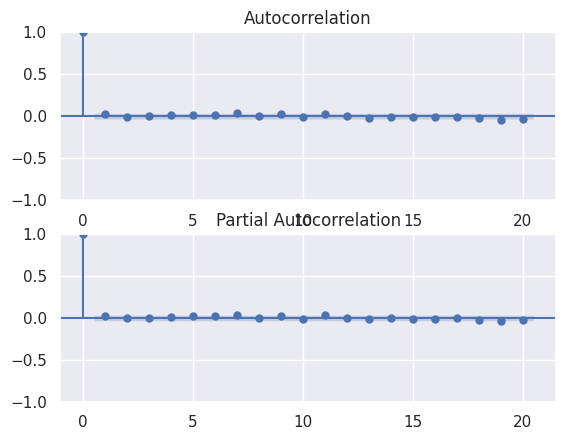

In [ ]:
# ACF & PACF Plots
Sale_df=Sale_df.dropna()
plt.figure()
plt.subplot(211)
plot_acf(Sale_df['SALES'], ax=plt.gca(), lags = 20)
plt.subplot(212)
plot_pacf(Sale_df['SALES'], ax=plt.gca(), lags = 20)
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model_111 = ARIMA(Sale_df.SALES, order=(1,1,1))
model_111_fit = model_111.fit()
print(model_111_fit.summary())
print('Residuals Description')
print(model_111_fit.resid.describe())

                               SARIMAX Results                                
Dep. Variable:                  SALES   No. Observations:                 2823
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -25224.225
Date:                Tue, 31 Oct 2023   AIC                          50454.450
Time:                        18:38:50   BIC                          50472.285
Sample:                             0   HQIC                         50460.885
                               - 2823                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0229      0.018      1.277      0.201      -0.012       0.058
ma.L1         -1.0000      0.017    -58.885      0.000      -1.033      -0.967
sigma2       3.39e+06   7.06e+04     47.992      0.0

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA(0,1,0) model
model_010 = ARIMA(Sale_df.SALES, order=(0,1,0))
model_010_fit = model_010.fit()

# Print model summary and residuals description
print(model_010_fit.summary())
print('Residuals Description')
print(model_010_fit.resid.describe())

                               SARIMAX Results                                
Dep. Variable:                  SALES   No. Observations:                 2823
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -26167.073
Date:                Tue, 31 Oct 2023   AIC                          52336.146
Time:                        18:38:58   BIC                          52342.091
Sample:                             0   HQIC                         52338.291
                               - 2823                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.628e+06   1.41e+05     46.967      0.000    6.35e+06     6.9e+06
Ljung-Box (L1) (Q):                 668.65   Jarque-Bera (JB):               148.70
Prob(Q):                              0.00   Pr

In the case of the two models you've shown, the ARIMA(1,1,1) model has an AIC of 50454.450 and a BIC of 50472.285, while the ARIMA(0,1,0) model has an AIC of 52336.146 and a BIC of 52342.091. Based on these criteria, it appears that the ARIMA(0,1,0) model is slightly better than the ARIMA(1,1,1) model

Performing some of the diagnostic tests and visual inspections

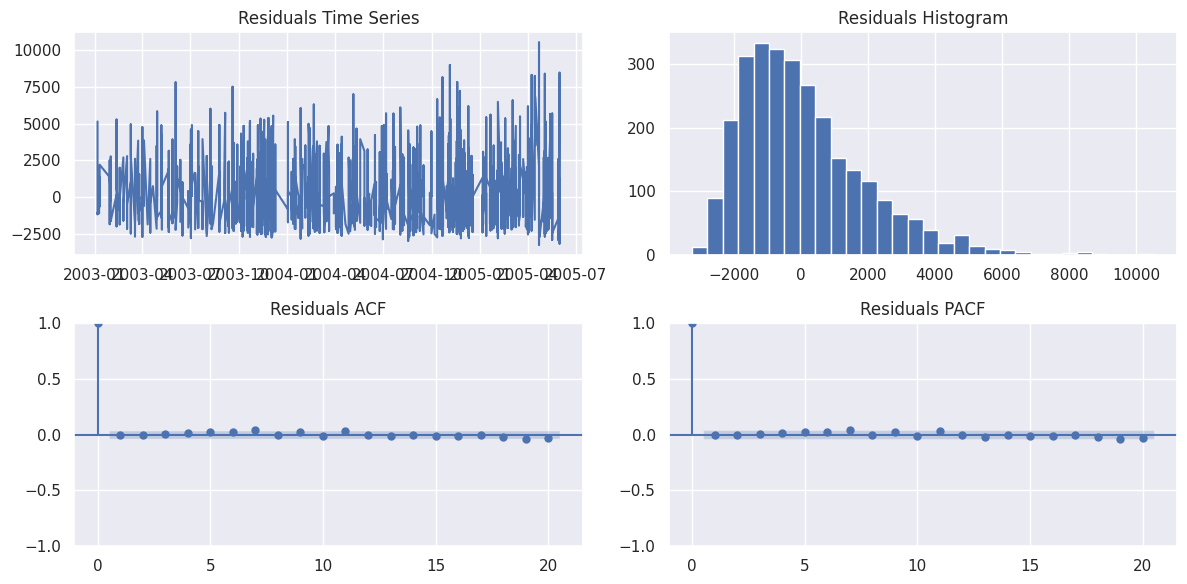

Forecast Accuracy:
MAE: 1491.512
RMSE: 2005.175


In [ ]:
# Check residuals
residuals = model_111_fit.resid
plt.figure(figsize=(12, 6))
plt.subplot(2,2,1)
plt.plot(residuals)
plt.title('Residuals Time Series')
plt.subplot(2,2,2)
plt.hist(residuals, bins=30)
plt.title('Residuals Histogram')
plt.subplot(2,2,3)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.title('Residuals ACF')
plt.subplot(2,2,4)
plot_pacf(residuals, lags=20, ax=plt.gca())
plt.title('Residuals PACF')
plt.tight_layout()
plt.show()
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Evaluate forecast accuracy
forecast = model_111_fit.forecast(steps=10)
actual = Sale_df.SALES[-10:]
mae = mean_absolute_error(actual, forecast)
rmse = mean_squared_error(actual, forecast, squared=False)
print('Forecast Accuracy:')
print(f'MAE: {mae:.3f}')
print(f'RMSE: {rmse:.3f}')

In [ ]:
from statsmodels.tsa.arima.model import ARIMA


# Fit the ARIMA(1,1,1) model
model = ARIMA(Sale_df.SALES, order=(1,1,1))
model_fit = model.fit()

# Forecast future values
forecast = model_fit.forecast(steps=10)

# Print forecast values
print('Forecast:')
print(forecast)

Forecast:
2823    3558.221612
2824    3553.197895
2825    3553.082842
2826    3553.080208
2827    3553.080147
2828    3553.080146
2829    3553.080146
2830    3553.080146
2831    3553.080146
2832    3553.080146
Name: predicted_mean, dtype: float64


In [ ]:
Sale_df=df_final.copy()

In [ ]:
Sale_df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,USA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,USA,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,2004-12-02,Shipped,4,12,2004,...,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,Spain,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,2005-01-31,Shipped,1,1,2005,...,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,Finland,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,2005-03-01,Resolved,1,3,2005,...,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,Spain,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,2005-03-28,Shipped,1,3,2005,...,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,France,Roulet,Annette,Small


In [ ]:
Sale_df = Sale_df.sort_values(by='ORDERDATE')
Sale_df.set_index('ORDERDATE', inplace=True)

# Fit the ARIMA(1,1,1) model
model = ARIMA(Sale_df.SALES, order=(1,1,1))
model_fit = model.fit()

In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  SALES   No. Observations:                 2823
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -25224.225
Date:                Tue, 31 Oct 2023   AIC                          50454.450
Time:                        18:41:36   BIC                          50472.285
Sample:                             0   HQIC                         50460.885
                               - 2823                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0229      0.018      1.277      0.201      -0.012       0.058
ma.L1         -1.0000      0.017    -58.885      0.000      -1.033      -0.967
sigma2       3.39e+06   7.06e+04     47.992      0.0

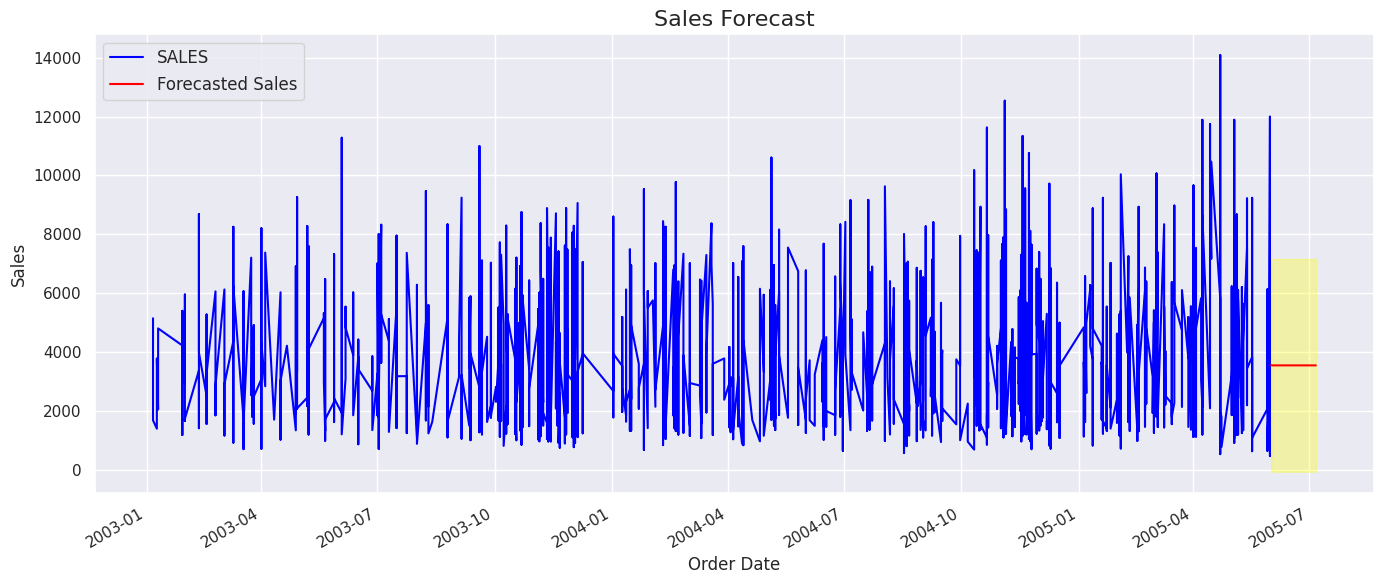

In [ ]:


forecast_values = model_fit.get_forecast(steps=36)

forecast_ci = forecast_values.conf_int()

# Plot the data
ax = Sale_df['SALES'].plot(figsize=(14, 6), legend=True, color='blue')

# Plot the forecasted values
forecast_index = pd.date_range(Sale_df.index[-1], periods=37, closed='right')
plt.plot(forecast_index, forecast_values.predicted_mean, color='red', label='Forecasted Sales')

ax.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='yellow', alpha=.3)

# Format the plot
plt.title('Sales Forecast', size=16)
plt.ylabel('Sales', size=12)
plt.xlabel('Order Date', size=12)
plt.legend(loc='upper left', prop={'size': 12})
plt.grid(True)
plt.tight_layout()
plt.show()


## Use ML to filter the most important features


In [ ]:

df_filtered = df_final.select_dtypes(include=['int64', 'float64'])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X = df_filtered.drop(['SALES', 'YEAR_ID'], axis=1)
y = df_final['SALES']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

X = df_filtered.drop(['SALES', 'YEAR_ID'], axis=1)
y = df_final['SALES']

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
importances = rf.feature_importances_
num_top_features = 5
sorted_idx = importances.argsort()[-num_top_features:]
top_features = X.columns[sorted_idx]


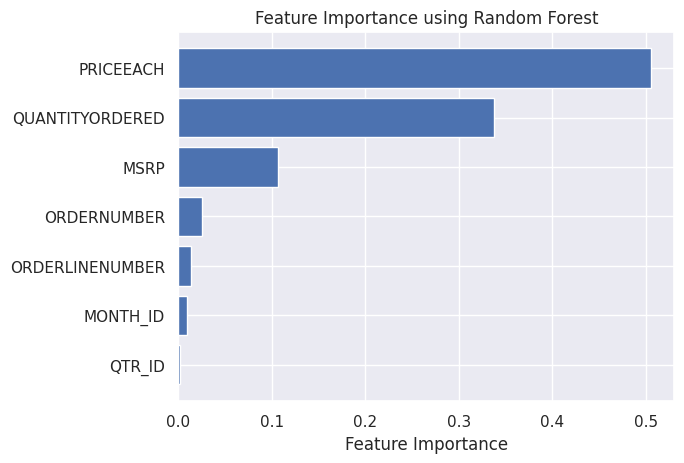

In [ ]:
sorted_idx = importances.argsort()
plt.barh(X.columns[sorted_idx], importances[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance using Random Forest')
plt.show()

In [ ]:

ts_data = df_final[['ORDERDATE'] + list(top_features) + ['SALES']]
ts_data = ts_data.sort_values(by='ORDERDATE')


In [ ]:
ts_data.head()

,ORDERDATE,ORDERLINENUMBER,ORDERNUMBER,MSRP,QUANTITYORDERED,PRICEEACH,SALES
578,2003-01-06,3,10100,170,30,100.00,5151.00
680,2003-01-06,2,10100,60,50,67.80,3390.00
1267,2003-01-06,4,10100,92,22,86.51,1903.22
2024,2003-01-06,1,10100,41,49,34.47,1689.03
1539,2003-01-09,3,10101,33,45,31.20,1404.00


use a model like SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors). The "X" in SARIMAX stands for exogenous, which are the other variables (or features) like to include in model

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

ts_data.set_index('ORDERDATE', inplace=True)


endog = ts_data['SALES']

# exogenous data (other features)
exog = ts_data[[ 'MSRP', 'QUANTITYORDERED', 'PRICEEACH']]

# Building the SARIMAX model
model = SARIMAX(endog=endog, exog=exog, order=(1,1,1))

# Fitting the model
results = model.fit()

print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  SALES   No. Observations:                 2823
Model:               SARIMAX(1, 1, 1)   Log Likelihood              -22983.735
Date:                Tue, 31 Oct 2023   AIC                          45979.470
Time:                        18:45:51   BIC                          46015.141
Sample:                             0   HQIC                         45992.341
                               - 2823                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
MSRP               15.6740      0.313     50.062      0.000      15.060      16.288
QUANTITYORDERED   102.5686      1.553     66.033      0.000      99.524     105.613
PRICEEACH          38.8129      

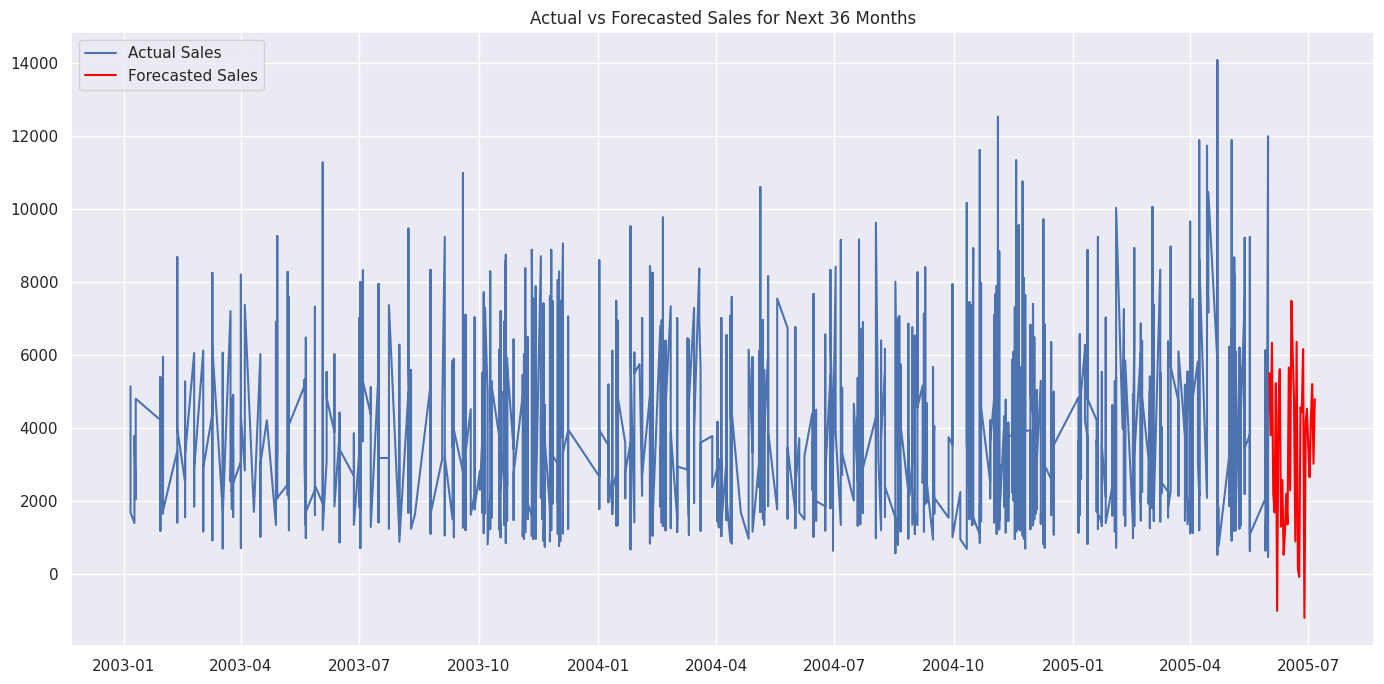

In [ ]:

# Forecast the next 36 months using the SARIMAX model
forecast = results.get_forecast(steps=36, exog=exog[-36:]).predicted_mean


plt.figure(figsize=(14, 7))
plt.plot(endog.index, endog.values, label='Actual Sales')

forecast_index = pd.date_range(endog.index[-1], periods=37, closed='right')
plt.plot(forecast_index, forecast, color='red', label='Forecasted Sales')

plt.title('Actual vs Forecasted Sales for Next 36 Months')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

CONCLUSION:


In this research, we employed two time series models. Initially, we utilized a simple univariate time series model. Subsequently, we applied machine learning techniques to filter and identify the most important features. With these features, we constructed a multivariate time series model

Both models share similar ARIMA components.
The SARIMAX model highlighted a strong correlation between SALES and the exogenous variables: MSRP, QUANTITYORDERED, and PRICEEACH.
Residuals in both models showed concerns regarding normality and heteroskedasticity.
The SARIMAX model, due to its incorporation of exogenous variables, is recommended for forecasting.